In [8]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
iris = load_iris()
X, y = iris.data, iris.target
df = pd.DataFrame(X, columns=iris.feature_names)

In [20]:
@np.vectorize
def mapvals(x, d):
    return(d[x])

colors = mapvals(y, {0:'r', 1:'g', 2:'b'})

<Figure size 2400x2400 with 0 Axes>

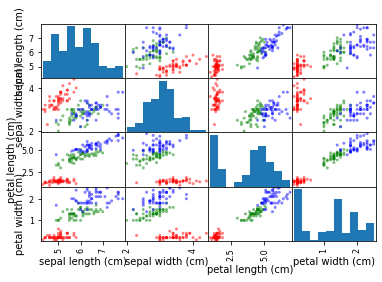

In [26]:
plt.figure(figsize=(12, 12), dpi=200)
pd.plotting.scatter_matrix(df, color=colors);

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(1)
knn.fit(X, y)
y_pred = knn.predict(X)

accuracy_score(y, y_pred)

1.0

In [60]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

digits = datasets.load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

k_choices = range(1, 20, 2)
scores = [0]*len(k_choices)

for i, k in enumerate(k_choices):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    scores[i] = accuracy_score(y_test, y_pred)
    

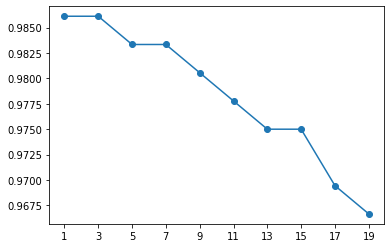

In [61]:
plt.plot(k_choices, scores, '-o')
plt.xticks(k_choices);

k_best = k_choices[np.argmax(scores)]

In [62]:
k_best

1

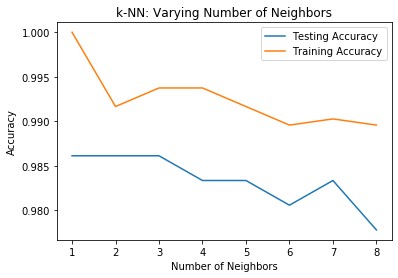

In [63]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
